<a href="https://colab.research.google.com/github/Tobsam237/Springboard_Project_Capstone2/blob/main/03_ExploratooryDataAnalysis_Capstone2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory Data Analysis of Motor Collisions & Crashes in City of New York

In [1]:
#import neccessary packages and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_wrangled2.csv to data_wrangled2.csv


In [3]:
df = pd.read_csv('data_wrangled2.csv', parse_dates=[['crash_date', 'crash_time']])
df.head()

,crash_date_crash_time,Unnamed: 0,index,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code1,latitude,longitude,borough,zip_code
0,2020-05-11 15:21:00,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,4313062,Sedan,40.852306,-73.898110,BRONX,10457.0
1,2020-05-11 13:20:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Backing Unsafely,4313088,Station Wagon/Sport Utility Vehicle,40.637585,-74.119934,STATEN ISLAND,10310.0
2,2020-05-11 17:30:00,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Backing Unsafely,4313056,Station Wagon/Sport Utility Vehicle,40.620430,-73.951490,BROOKLYN,11210.0
3,2020-05-11 18:24:00,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,4313208,Motorcycle,40.760800,-73.939150,QUEENS,11106.0
4,2020-05-11 09:34:00,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Following Too Closely,4313242,Ambulance,40.790417,-73.951840,MANHATTAN,10029.0


#**Initial Cleanup**

In [4]:
#a quick cleaning Unamed and index col...

df = df.drop(['Unnamed: 0', 'index'], axis=1)

In [5]:
df.describe()

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id,latitude,longitude,zip_code
count,86100.000000,86100.000000,86100.000000,86100.000000,86100.000000,86100.000000,86100.000000,86100.000000,8.610000e+04,86100.000000,86100.000000,86100.000000
mean,0.436074,0.002520,0.055923,0.000999,0.060465,0.000267,0.319686,0.001254,4.360583e+06,40.519887,-73.538398,10898.046632
std,0.781209,0.053066,0.242178,0.031954,0.244790,0.016342,0.751786,0.039135,2.743684e+04,2.891970,5.247040,516.435702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.073803e+06,0.000000,-74.251150,10000.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.336836e+06,40.665630,-73.956474,10456.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.360610e+06,40.713190,-73.916445,11208.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.384351e+06,40.795993,-73.865420,11239.000000
max,16.000000,3.000000,7.000000,2.000000,7.000000,1.000000,16.000000,3.000000,4.408427e+06,40.912884,0.000000,11697.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86100 entries, 0 to 86099
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   crash_date_crash_time          86100 non-null  datetime64[ns]
 1   number_of_persons_injured      86100 non-null  float64       
 2   number_of_persons_killed       86100 non-null  float64       
 3   number_of_pedestrians_injured  86100 non-null  float64       
 4   number_of_pedestrians_killed   86100 non-null  float64       
 5   number_of_cyclist_injured      86100 non-null  float64       
 6   number_of_cyclist_killed       86100 non-null  float64       
 7   number_of_motorist_injured     86100 non-null  float64       
 8   number_of_motorist_killed      86100 non-null  float64       
 9   contributing_factor_vehicle_1  86100 non-null  object        
 10  collision_id                   86100 non-null  int64         
 11  vehicle_type_co

In [8]:
df.columns

Index(['crash_date_crash_time', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'collision_id', 'vehicle_type_code1', 'latitude', 'longitude',
       'borough', 'zip_code'],
      dtype='object')

#**EDA:** Exploratory Data Analysis

In [9]:
#rank severity and fatality of accident by borough?
df_by_borough = df[['borough',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed']].groupby('borough').sum()
df_by_borough

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
borough,,,,,,,,
BRONX,7011.0,47.0,885.0,18.0,753.0,7.0,5373.0,22.0
BROOKLYN,13089.0,63.0,1757.0,26.0,2026.0,9.0,9306.0,28.0
MANHATTAN,5458.0,26.0,926.0,12.0,1307.0,5.0,3225.0,9.0
QUEENS,11204.0,74.0,1175.0,26.0,1067.0,2.0,8962.0,46.0
STATEN ISLAND,784.0,7.0,72.0,4.0,53.0,0.0,659.0,3.0


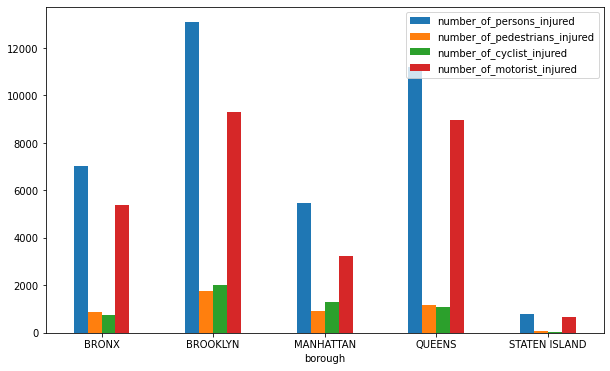

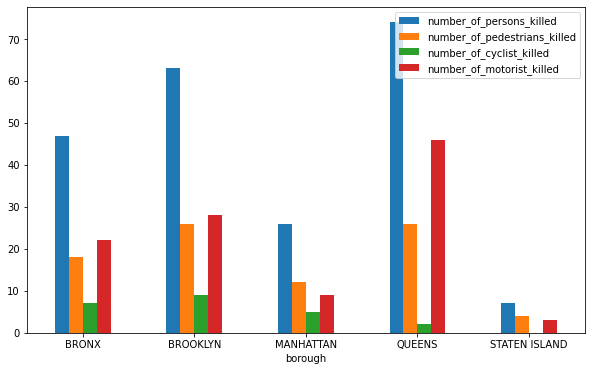

In [10]:
#plt.figure(figsize=(25,15))
df_by_borough[[
       'number_of_persons_injured',
       'number_of_pedestrians_injured', 
       'number_of_cyclist_injured', 
       'number_of_motorist_injured',]].plot.bar(rot=0, figsize=(10,6))

df_by_borough[[
        'number_of_persons_killed',
        'number_of_pedestrians_killed',
        'number_of_cyclist_killed',
        'number_of_motorist_killed'
       ]].plot.bar(rot=0, figsize=(10,6))
plt.show()

Observe that Brooklyn registers the highest number of killed and injured cyclist while Queens has the hihest number of motorist killed during a crash.
**Why is the motorist fatality so high in Queens despite having one of the lowest registerd cyclist fatalities and the largest land area?** I suspect most accidents in queens occured on highways causing increase in severity, but away from bike routes thus avoiding cyclist. 


#Date-time indexed 

In [11]:
df_dt_indexed = df.set_index('crash_date_crash_time').sort_index()
df_dt_indexed.head()

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code1,latitude,longitude,borough,zip_code
crash_date_crash_time,,,,,,,,,,,,,,,
2020-05-11 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,4313160,Sedan,40.758636,-73.885950,QUEENS,11370.0
2020-05-11 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,4313050,Station Wagon/Sport Utility Vehicle,40.743120,-73.861180,QUEENS,11368.0
2020-05-11 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,4317636,Station Wagon/Sport Utility Vehicle,40.630497,-74.079860,STATEN ISLAND,10304.0
2020-05-11 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,4313048,Bike,40.742180,-73.850876,QUEENS,11368.0
2020-05-11 00:55:00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Driver Inexperience,4312733,Sedan,40.683804,-73.833534,QUEENS,11420.0


In [12]:
#What are the top contributing factors to car crashes

df['contributing_factor_vehicle_1'].value_counts().head(15)

Unspecified                       23620
Driver Inattention/Distraction    21510
Failure to Yield Right-of-Way      5260
Following Too Closely              4845
Passing Too Closely                3298
Passing or Lane Usage Improper     3212
Backing Unsafely                   2903
Unsafe Speed                       2806
Other Vehicular                    2621
Traffic Control Disregarded        2217
Driver Inexperience                1630
Turning Improperly                 1606
Unsafe Lane Changing               1562
Alcohol Involvement                1346
Reaction to Uninvolved Vehicle     1236
Name: contributing_factor_vehicle_1, dtype: int64

In [13]:
#Plot pie charts of injured/killed by accident contributing factor
accidents_factors = ['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Following Too Closely', 
                     'Passing or Lane Usage Improper	', 'Backing Unsafely', 'Unsafe Speed']
df_accidents = df[df.contributing_factor_vehicle_1.isin(accidents_factors)]

df_accidents.shape

(37324, 16)

In [14]:
df_by_factorhead = df_accidents[['contributing_factor_vehicle_1',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed']].groupby('contributing_factor_vehicle_1').sum()
df_by_factorhead

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed
contributing_factor_vehicle_1,,,,,,,,
Backing Unsafely,512.0,3.0,245.0,3.0,36.0,0.0,231.0,0.0
Driver Inattention/Distraction,10040.0,27.0,1254.0,16.0,1697.0,5.0,7089.0,6.0
Failure to Yield Right-of-Way,3837.0,11.0,1090.0,6.0,679.0,1.0,2068.0,4.0
Following Too Closely,2783.0,0.0,16.0,0.0,111.0,0.0,2656.0,0.0
Unsafe Speed,2008.0,42.0,108.0,6.0,107.0,1.0,1793.0,35.0


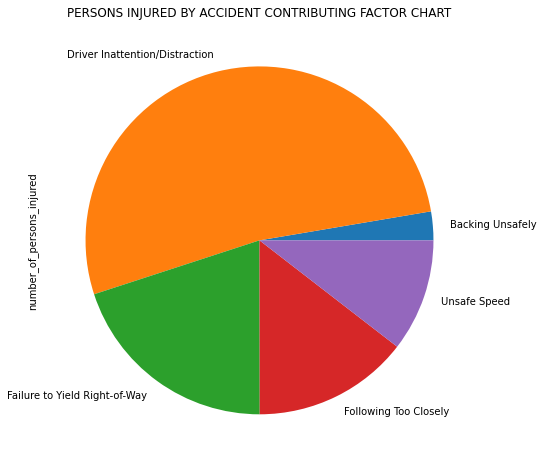

In [15]:
df_by_factorhead['number_of_persons_injured'].plot(kind = 'pie', figsize=(8,8))
plt.title('PERSONS INJURED BY ACCIDENT CONTRIBUTING FACTOR CHART')
plt.show()

Majority of all car crashes is caused by *Driver Inattention/Distraction* which could be as a result of cellphoen/gadget use while driving, eating, GPS, make-up application, and avariety of other activities.

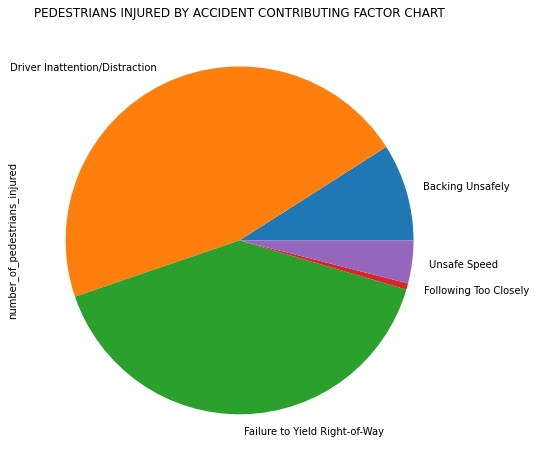

In [16]:
df_by_factorhead['number_of_pedestrians_injured'].plot(kind = 'pie', figsize = (8,8))
plt.title('PEDESTRIANS INJURED BY ACCIDENT CONTRIBUTING FACTOR CHART')
plt.show()

Observe from the above pie chart that *Failure to Yield Righ-of-Way* is relatively higher cause for pedestrain injuries in registerd accidents. I suspect pedestrains could be responsible  for this as the use of phones by pedestrains is on the rise while ignoring walk signals. But still drivers have a role to play.  

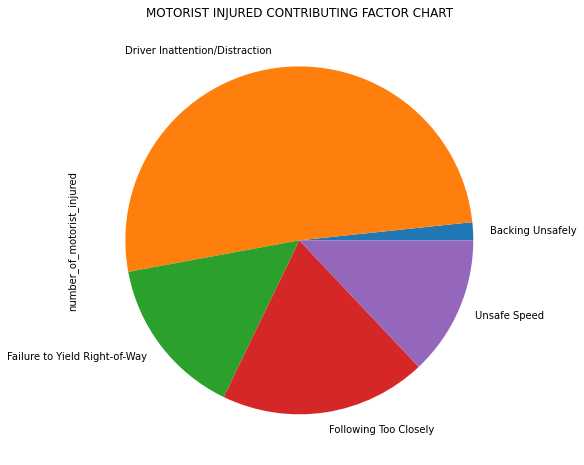

In [17]:
df_by_factorhead['number_of_motorist_injured'].plot(kind = 'pie', figsize=(8,8))
plt.title('MOTORIST INJURED CONTRIBUTING FACTOR CHART')
plt.show()

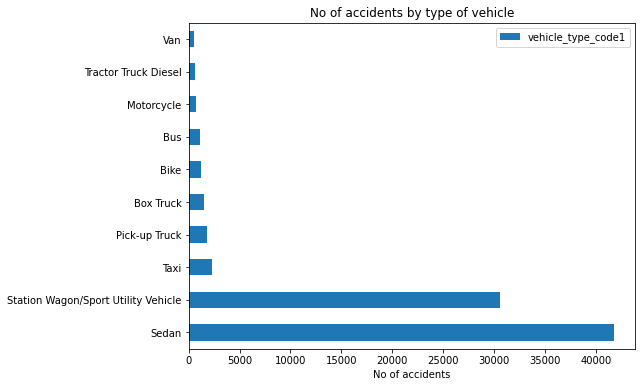

In [18]:
#What type of vehicles are most involved in the accidents
df_by_vehicle = df['vehicle_type_code1'].value_counts().to_frame().head(10)
df_by_vehicle.plot.barh(figsize=(8,6))
plt.xlabel('No of accidents')
plt.title('No of accidents by type of vehicle')
plt.show()

From the above, majority of vehicles on the road are sedans as thus, it make sense to have higher chance of accidents. However, inexperienced and newbie drivers are more likely to drive sedans thus, higher chance of crashes from sedans.

In [19]:
#set date_time as index
df_ts = df.set_index('crash_date_crash_time').sort_index()
df_ts.head()

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code1,latitude,longitude,borough,zip_code
crash_date_crash_time,,,,,,,,,,,,,,,
2020-05-11 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,4313160,Sedan,40.758636,-73.885950,QUEENS,11370.0
2020-05-11 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,4313050,Station Wagon/Sport Utility Vehicle,40.743120,-73.861180,QUEENS,11368.0
2020-05-11 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,4317636,Station Wagon/Sport Utility Vehicle,40.630497,-74.079860,STATEN ISLAND,10304.0
2020-05-11 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,4313048,Bike,40.742180,-73.850876,QUEENS,11368.0
2020-05-11 00:55:00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Driver Inexperience,4312733,Sedan,40.683804,-73.833534,QUEENS,11420.0


In [20]:
df_ts

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code1,latitude,longitude,borough,zip_code
crash_date_crash_time,,,,,,,,,,,,,,,
2020-05-11 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,4313160,Sedan,40.758636,-73.885950,QUEENS,11370.0
2020-05-11 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,4313050,Station Wagon/Sport Utility Vehicle,40.743120,-73.861180,QUEENS,11368.0
2020-05-11 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,4317636,Station Wagon/Sport Utility Vehicle,40.630497,-74.079860,STATEN ISLAND,10304.0
2020-05-11 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Driver Inattention/Distraction,4313048,Bike,40.742180,-73.850876,QUEENS,11368.0
2020-05-11 00:55:00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Driver Inexperience,4312733,Sedan,40.683804,-73.833534,QUEENS,11420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16 23:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tire Failure/Inadequate,4408124,Sedan,40.645880,-73.951950,BROOKLYN,11226.0
2021-04-16 23:20:00,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Unspecified,4408038,Station Wagon/Sport Utility Vehicle,40.649788,-73.962200,BROOKLYN,11226.0
2021-04-16 23:25:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unsafe Lane Changing,4408198,Sedan,40.843903,-73.927284,BRONX,10452.0


In [21]:
#Monthly accidents count
df_b = df_ts['zip_code'].resample('MS').count().to_frame()
df_b

,zip_code
crash_date_crash_time,
2020-05-01,4049
2020-06-01,6959
2020-07-01,8434
2020-08-01,8950
2020-09-01,8726
2020-10-01,8792
2020-11-01,8214
2020-12-01,7606
2021-01-01,6956


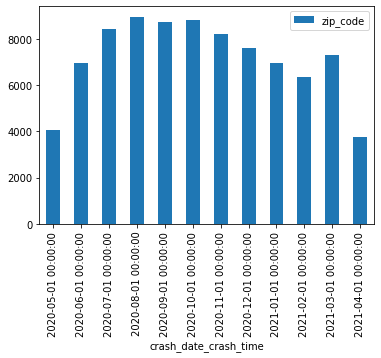

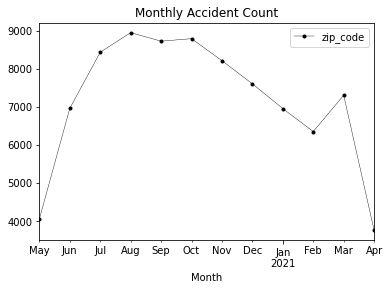

In [22]:
df_b.plot(kind='bar')
df_b.plot(color='k',linestyle='-',marker='.',linewidth=0.4)
plt.xlabel('Month')
plt.title('Monthly Accident Count')
plt.show()

Observe that counts of crashes are higher between Jun to Nov. **I suspect the weather correlates with the counts.** The warmer months registered higher car crashes

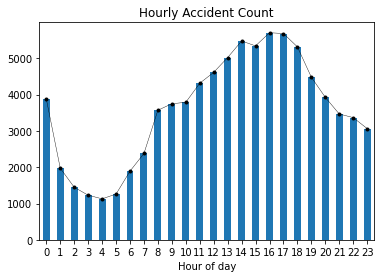

In [23]:
#What time of the day does most accident occur
df_ts.index.hour.value_counts().sort_index().plot(kind = 'bar')
df_ts.index.hour.value_counts().sort_index().plot(color='k',linestyle='-',marker='.',linewidth=0.4)
plt.xlabel('Hour of day')
plt.title('Hourly Accident Count')
plt.show()

Observe from the above that crahes count maxed between 8am to 7pm.  Motor vehicle accidents take place with greater frequency during rush hour. Drivers can become frustrated and agitated with traffic, which can cause them to make dangerous decisions behind the wheel.

In [24]:
# create new feature for timeseries analysis.
df_ts['Count'] = 1

<Figure size 720x432 with 0 Axes>

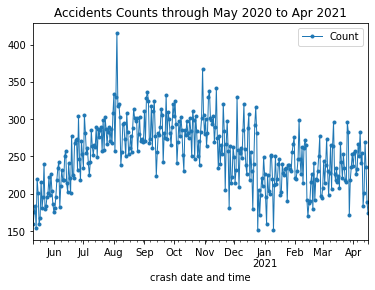

In [25]:
#Plot counts of accidents
plt.figure(figsize=(10,6))
df_ts['Count'].resample('D').count().to_frame().plot(linewidth=1,marker='.')
plt.xlabel('crash date and time')
plt.title('Accidents Counts through May 2020 to Apr 2021')
plt.show()

In [26]:
# generate heatmap of location of accidents
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

In [27]:
fig = px.density_mapbox(df, lat='latitude', lon='longitude', radius=5,
                        center=dict(lat=40.730610, lon=-73.935242), zoom=12,
                        mapbox_style="open-street-map", height=900)

fig.show()

Observe fom the heatmap that crashes are denser on highwways and junctions than streets as earlier suspected in Queens. Also, there appears to be a pattern of crash hotspots on some particular locations which we will further investigate in future work.